# Prototype notebook to semantically represent Learning Path with Schema.org

authors: Phil Reed, Alban Gaignard, Leyla Jael Castro

- Initially drafted the 20th of November 2025, as part of Bioschemas activities and ELIXIR BioHackathon Europe 2025.
- Refined at de.NBI BioHackathon Germany 2025.
- To be revised by the community.

Any questions, please contact phil.reed@manchester.ac.uk, alban.gaignard@univ-nantes.fr



In [2]:
!pip install rdflib

# Sample Learning path
https://tess.elixir-europe.org/learning_paths/introduction-to-galaxy-and-sequence-analysis-6384c0ed-3546-41cf-ac30-bff8680dd96c

LP structure: [syllabusSections=M1,M2]
- **Module 1: Introduction to Galaxy** [itemListElement=11,12,3] [nextItem=M2]
  - (1.1) A short introduction to Galaxy [nextItem=12]
  - (1.2) Galaxy Basics for genomics [nextItem=M2,21,3]
  - _(3) TrainingMaterial shared by Module 1 and 2_
- **Module 2: Basics of Genome Sequence Analysis** [itemListElement=11,12,3]
  - (2.1) Quality Control [nextItem=22]
  - (2.2) Mapping [nextItem=23]
  - (2.3) An Introduction to Genome Assembly [nextItem=24]
  - (2.4) TrainingMaterial 24 [nextItem=3]
  - _(3) TrainingMaterial shared by Module 1 and 2_

In [43]:
from rdflib import Graph

my_learning_path = """
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema: <https://schema.org/> .
@prefix ex: <http://example.org/> .

ex:GA_learning_path a schema:Course ;
    schema:name "Introduction to Galaxy and Sequence analysis" ;
    schema:description "This learning path aims to teach you the basics of Galaxy and analysis of sequencing data. " ;
    schema:provider ex:ExampleUniversity ;
    schema:courseCode "GSA101" ;
    schema:syllabusSections ex:Module_2, ex:Module_1 .

ex:Module_1 a schema:Syllabus, schema:Course, schema:ListItem, schema:ItemList ;
    schema:name "Module 1: Introduction to Galaxy" ;
    schema:teaches "Learn how to create a workflow" ;
    schema:nextItem ex:Module_2 ;
    schema:itemListElement ex:TM11, ex:TM12, ex:TM3 .

ex:Module_2 a schema:Syllabus, schema:Course, schema:ListItem, schema:ItemList  ;
    schema:name "Module 2: Basics of Genome Sequence Analysis" ;
    schema:teaches "Use genome browser to understand your data" ;
    schema:itemListElement ex:TM21, ex:TM22, ex:TM23, ex:TM24, ex:TM3 .


ex:TM11 a schema:LearningResource, schema:ListItem ;
    schema:name "(1.1) A short introduction to Galaxy" ;
    schema:description "What is Galaxy" ;
    schema:url "https://tess.elixir-europe.org/materials/hands-on-for-a-short-introduction-to-galaxy-tutorial?lp=1%3A1" ;
    schema:nextItem ex:TM12 .

ex:TM12 a schema:LearningResource, schema:ListItem ;
    schema:name "(1.2) Galaxy Basics for genomics" ;
    schema:description "The basic details for Galaxy genomics" ;
    schema:nextItem ex:Module_2, ex:TM21, ex:TM3 .

ex:TM21 a schema:LearningResource, schema:ListItem ;
    schema:name "(2.1) Quality Control" ;
    schema:description "Ensure you follow quality control practices" ;
    schema:nextItem ex:TM22 .

ex:TM22 a schema:LearningResource, schema:ListItem ;
    schema:name "(2.2) Mapping" ;
    schema:description "Alignment and mapping" ;
    schema:nextItem ex:TM23 .

ex:TM23 a schema:LearningResource, schema:ListItem ;
    schema:name "(2.3) An Introduction to Genome Assembly" ;
    schema:description "Description of TrainingMaterial 23" ;
    schema:nextItem ex:TM24 .

ex:TM24 a schema:LearningResource, schema:ListItem ;
    schema:name "(2.4) TrainingMaterial 24" ;
    schema:description "Description of TrainingMaterial 24" ;
    schema:nextItem ex:TM3 .

ex:TM3 a schema:LearningResource, schema:ListItem ;
    schema:name "(3) TrainingMaterial shared by Module 1 and 2" .
"""

kg = Graph()
kg.parse(data=my_learning_path, format="turtle")
kg.serialize(destination="lp.ttl", format="turtle")
kg.serialize(destination="lp.jsonld", format="json-ld")

<Graph identifier=Ncc8d10ef614745bc983ea5d515646019 (<class 'rdflib.graph.Graph'>)>

In [44]:
print(kg.serialize(format="turtle"))
print(len(kg))

@prefix ex: <http://example.org/> .
@prefix schema: <https://schema.org/> .

ex:GA_learning_path a schema:Course ;
    schema:courseCode "GSA101" ;
    schema:description "This learning path aims to teach you the basics of Galaxy and analysis of sequencing data. " ;
    schema:name "Introduction to Galaxy and Sequence analysis" ;
    schema:provider ex:ExampleUniversity ;
    schema:syllabusSections ex:Module_1,
        ex:Module_2 .

ex:Module_1 a schema:Course,
        schema:ItemList,
        schema:ListItem,
        schema:Syllabus ;
    schema:itemListElement ex:TM11,
        ex:TM12,
        ex:TM3 ;
    schema:name "Module 1: Introduction to Galaxy" ;
    schema:nextItem ex:Module_2 ;
    schema:teaches "Learn how to create a workflow" .

ex:TM11 a schema:LearningResource,
        schema:ListItem ;
    schema:description "What is Galaxy" ;
    schema:name "(1.1) A short introduction to Galaxy" ;
    schema:nextItem ex:TM12 ;
    schema:url "https://tess.elixir-europe.org/materia

In [45]:
print(kg.serialize(format="json-ld"))

[
  {
    "@id": "http://example.org/GA_learning_path",
    "@type": [
      "https://schema.org/Course"
    ],
    "https://schema.org/courseCode": [
      {
        "@value": "GSA101"
      }
    ],
    "https://schema.org/description": [
      {
        "@value": "This learning path aims to teach you the basics of Galaxy and analysis of sequencing data. "
      }
    ],
    "https://schema.org/name": [
      {
        "@value": "Introduction to Galaxy and Sequence analysis"
      }
    ],
    "https://schema.org/provider": [
      {
        "@id": "http://example.org/ExampleUniversity"
      }
    ],
    "https://schema.org/syllabusSections": [
      {
        "@id": "http://example.org/Module_2"
      },
      {
        "@id": "http://example.org/Module_1"
      }
    ]
  },
  {
    "@id": "http://example.org/TM21",
    "@type": [
      "https://schema.org/LearningResource",
      "https://schema.org/ListItem"
    ],
    "https://schema.org/description": [
      {
        "@value":

In [46]:
# I'm interested in a specific training material, what should be the prerequisites ?

tm_of_interest = "(2.3) An Introduction to Genome Assembly"

def query_learning_path():
  query = f"""
  SELECT * WHERE {{
    ?s schema:name "{tm_of_interest}" .
    ?prereq schema:nextItem+ ?s .
    ?prereq schema:name ?prereq_name .
    ?a_module schema:itemListElement ?prereq .
    ?a_module schema:name ?module_name .
  }}
  """
  # Run SPARQL query
  res_kg = kg.query(query)
  print(f'If you are interested in {tm_of_interest}')
  for r in res_kg:
    print(f'You need to perform {r["prereq_name"]} as part of the module {r["module_name"]}')
  return res_kg

query_learning_path()

If you are interested in (2.3) An Introduction to Genome Assembly
You need to perform (2.2) Mapping as part of the module Module 2: Basics of Genome Sequence Analysis
You need to perform (2.1) Quality Control as part of the module Module 2: Basics of Genome Sequence Analysis
You need to perform (1.2) Galaxy Basics for genomics as part of the module Module 1: Introduction to Galaxy
You need to perform (1.1) A short introduction to Galaxy as part of the module Module 1: Introduction to Galaxy


## What we did until now

1.  **RDF Graph Initialization**: We loaded a learning path described in Turtle format into an RDFLib graph (`kg`). We extensively used Schema.org to model the LearningPath Syllabus, ItemList and ListItem types, as well as Course and LearningResource types.
2.  **Prerequisite Query**: We demonstrated how to query the graph using SPARQL to find prerequisites for a specific learning material.


# Visualization of the Schema.org metadata

In [47]:
from rdflib import Graph, Literal, URIRef
from rdflib.namespace import RDF, RDFS, OWL, XSD

def extract_relationships_and_names(graph):
    # Define prefixes
    schema = URIRef("https://schema.org/")
    ex = URIRef("http://example.org/")

    # 1. Query for all entities with a schema:name and store their names
    entity_names = {}
    name_query = """
    PREFIX schema: <https://schema.org/>
    SELECT ?entity ?name
    WHERE {
        ?entity schema:name ?name .
    }
    """
    for row in graph.query(name_query):
        entity_names[str(row.entity)] = str(row.name)

    print("Extracted entity names:")
    for uri, name in entity_names.items():
        print(f"  {uri}: {name}")

    # 2. Query for sequential relationships
    relationships_query = """
    PREFIX schema: <https://schema.org/>
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
        FILTER (?p = schema:nextItem || ?p = schema:itemListElement || ?p = schema:step)
    }
    """
    raw_relationships = []
    for row in graph.query(relationships_query):
        raw_relationships.append((str(row.s), str(row.p), str(row.o)))

    print("\nExtracted raw relationships:")
    for rel in raw_relationships:
        print(f"  {rel[0]} -- {rel[1]} --> {rel[2]}")

    # 3. Transform relationships to use names
    mermaid_edges = []
    for s_uri, p_uri, o_uri in raw_relationships:
        s_name = entity_names.get(s_uri, s_uri.split('/')[-1]) # Use URI fragment if name not found
        o_name = entity_names.get(o_uri, o_uri.split('/')[-1]) # Use URI fragment if name not found
        predicate_type = p_uri.split('/')[-1] # Get predicate name (e.g., nextItem)
        mermaid_edges.append((s_name, predicate_type, o_name))

    print("\nTransformed relationships for Mermaid diagram:")
    for edge in mermaid_edges:
        print(f"  {edge[0]} -- {edge[1]} --> {edge[2]}")

    return entity_names, mermaid_edges

# Call the function with the existing kg graph
all_entity_names, all_mermaid_edges = extract_relationships_and_names(kg)

# Assign to the global query_learning_path function as well if needed later
def query_learning_path():
    return all_entity_names, all_mermaid_edges

print("Relationship extraction complete. Results stored in all_entity_names and all_mermaid_edges.")

Extracted entity names:
  http://example.org/GA_learning_path: Introduction to Galaxy and Sequence analysis
  http://example.org/Module_1: Module 1: Introduction to Galaxy
  http://example.org/Module_2: Module 2: Basics of Genome Sequence Analysis
  http://example.org/TM11: (1.1) A short introduction to Galaxy
  http://example.org/TM12: (1.2) Galaxy Basics for genomics
  http://example.org/TM21: (2.1) Quality Control
  http://example.org/TM22: (2.2) Mapping
  http://example.org/TM23: (2.3) An Introduction to Genome Assembly
  http://example.org/TM24: (2.4) TrainingMaterial 24
  http://example.org/TM3: (3) TrainingMaterial shared by Module 1 and 2

Extracted raw relationships:
  http://example.org/Module_2 -- https://schema.org/itemListElement --> http://example.org/TM22
  http://example.org/TM22 -- https://schema.org/nextItem --> http://example.org/TM23
  http://example.org/Module_2 -- https://schema.org/itemListElement --> http://example.org/TM21
  http://example.org/TM24 -- https://s

In [50]:
mermaid_lines = []
mermaid_lines.append('graph TD')

for s_name, p_type, o_name in all_mermaid_edges:
    # Sanitize names for Mermaid if they contain special characters or spaces
    # Mermaid node IDs cannot contain spaces or special characters directly
    # We'll use a simple approach: if a name has spaces, enclose it in quotes.
    # For simplicity, we'll map original names to safe IDs and use names for labels

    # Create a unique ID for each node if it's not already in the entity_names (which are already unique names)
    # For this exercise, we will assume the names are unique enough for node IDs or simply use them as both ID and label.
    # Mermaid allows IDs with spaces if quoted, but it's cleaner to have simple IDs.
    # However, given the prompt directly asks for f'{source_name} -- {predicate_type} --> {target_name}',
    # we will use the names as they are, and Mermaid should handle simple spaces correctly in labels.

    # Let's ensure node labels are quoted if they contain spaces to be robust
    # Mermaid syntax: A["Node Name"] or A --> B["Another Node"]
    # For simplicity, let's use the names directly as node IDs and labels.
    # Mermaid handles spaces in node labels gracefully if they are quoted, but for connections
    # the IDs should be simple. Let's make sure our approach is compatible.

    # A common Mermaid practice is to have a simple ID for the node and then a label
    # like: ID[Label]. If we use the name as ID, it should not have spaces.
    # Given the previous step produced names like 'Module 1', we should create a mapping for node IDs.

    # Let's refine how we generate the Mermaid lines to ensure valid syntax
    # Create a mapping from clean name to a unique, mermaid-safe ID
    # This mapping is important to handle cases where names might have characters that Mermaid IDs don't like
    node_id_map = {}
    counter = 0
    for uri_name in all_entity_names.values():
        clean_name = uri_name.replace(' ', '_').replace('-', '_').replace(':', '_').replace('.', '_').strip()
        if clean_name not in node_id_map.values():
            node_id_map[uri_name] = f'N{counter}'
            counter += 1

    # Create mermaid lines with unique IDs and original names as labels
    mermaid_lines = ['graph TD']
    for s_name, p_type, o_name in all_mermaid_edges:
        source_id = node_id_map.get(s_name, s_name.replace(' ', '_').replace('-', '_').replace(':', '_').replace('.', '_').strip())
        target_id = node_id_map.get(o_name, o_name.replace(' ', '_').replace('-', '_').replace(':', '_').replace('.', '_').strip())

        # Add node definitions with labels if they contain spaces
        if ' ' in s_name:
            mermaid_lines.append(f'{source_id}[\"{s_name}\"]')
        if ' ' in o_name:
            mermaid_lines.append(f'{target_id}[\"{o_name}\"]')

        mermaid_lines.append(f'{source_id} -- {p_type} --> {target_id}')

mermaid_syntax = '\n'.join(mermaid_lines)

# display the markdown mermaid graph as output of this cell
print(mermaid_syntax)

graph TD
N2["Module 2: Basics of Genome Sequence Analysis"]
N6["(2.2) Mapping"]
N2 -- itemListElement --> N6
N6["(2.2) Mapping"]
N7["(2.3) An Introduction to Genome Assembly"]
N6 -- nextItem --> N7
N2["Module 2: Basics of Genome Sequence Analysis"]
N5["(2.1) Quality Control"]
N2 -- itemListElement --> N5
N8["(2.4) TrainingMaterial 24"]
N9["(3) TrainingMaterial shared by Module 1 and 2"]
N8 -- nextItem --> N9
N1["Module 1: Introduction to Galaxy"]
N9["(3) TrainingMaterial shared by Module 1 and 2"]
N1 -- itemListElement --> N9
N4["(1.2) Galaxy Basics for genomics"]
N9["(3) TrainingMaterial shared by Module 1 and 2"]
N4 -- nextItem --> N9
N1["Module 1: Introduction to Galaxy"]
N4["(1.2) Galaxy Basics for genomics"]
N1 -- itemListElement --> N4
N4["(1.2) Galaxy Basics for genomics"]
N2["Module 2: Basics of Genome Sequence Analysis"]
N4 -- nextItem --> N2
N4["(1.2) Galaxy Basics for genomics"]
N5["(2.1) Quality Control"]
N4 -- nextItem --> N5
N1["Module 1: Introduction to Galaxy"]
N2["Modu

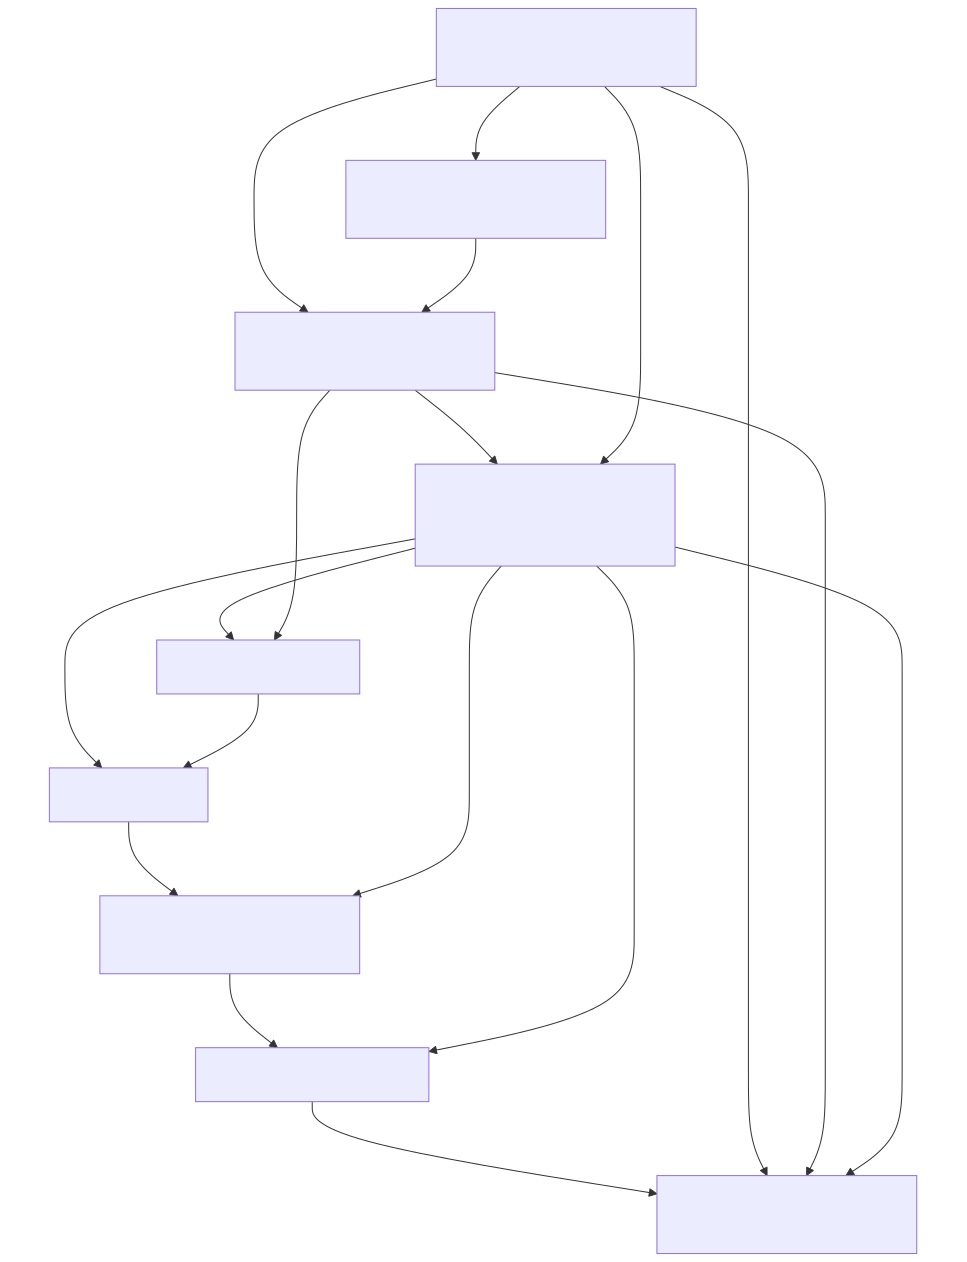

In [49]:
#from IPython.display import display, Markdown
#Markdown(mermaid_syntax)

import base64
from IPython.display import display_svg
from urllib.request import Request, urlopen

def mm(graph):
    graphbytes = graph.encode("ascii")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    url="https://mermaid.ink/svg/" + base64_string
    req=Request(url, headers={'User-Agent': 'IPython/Notebook'})
    display_svg(urlopen(req).read().decode(), raw=True)
mm(mermaid_syntax)